In [14]:
import pandas as pd;
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
os.chdir(r'C:\Users\fatem\Downloads\housekeeping_genes')

In [67]:
df = pd.read_excel('HouseKeeping genes-Trends in Genetics 29, (2013).xlsx')
df
df.dropna(inplace = True,axis = 'rows')
np.sum(pd.isna(df))
df['avg_ctl'] = (df['CT-B1'] + df['CT-Z1'])/2


In [85]:
df.describe()


,CT-B1,CT-Z1,FERSHTEH-ABDI,MOH-JAF-NORM,MOH-JAF-WART,avg_ctl
count,3.575000e+03,3.575000e+03,3.575000e+03,3.575000e+03,3575.000000,3.575000e+03
mean,6.810128e+01,6.507293e+01,7.125283e+01,7.139326e+01,73.383998,6.658710e+01
std,1.040845e+02,9.074649e+01,1.352895e+02,1.267321e+02,141.071927,9.704534e+01
min,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-07,0.000001,1.000000e-08
25%,2.524509e+01,2.518168e+01,2.338523e+01,2.549558e+01,21.341863,2.541089e+01
50%,4.346460e+01,4.308374e+01,4.117558e+01,4.355352e+01,39.877625,4.333621e+01
75%,7.278855e+01,7.183446e+01,7.150690e+01,7.420439e+01,74.872882,7.234949e+01
max,1.937866e+03,1.527204e+03,2.807003e+03,2.605198e+03,2862.454810,1.732535e+03


In [88]:
#remove outliers
df[df['avg_ctl']== np.max(df['avg_ctl'])]
df.drop(index = 2673,inplace = True, axis = 'rows')


In [84]:
df

,Genes,CT-B1,CT-Z1,FERSHTEH-ABDI,MOH-JAF-NORM,MOH-JAF-WART,avg_ctl
0,AAAS,33.456929,31.594090,52.17486,30.393560,22.836775,32.525510
1,AAGAB,38.941788,33.185432,42.62874,49.392114,58.597489,36.063610
2,AAMP,124.793669,95.216369,140.61010,126.100522,116.538709,110.005019
3,AAR2,45.944214,41.735951,51.55188,42.470841,29.212764,43.840083
4,AARS,85.398004,76.618349,86.18215,63.341667,74.176160,81.008176
...,...,...,...,...,...,...,...
3798,ZSWIM7,17.281256,18.832450,10.81801,22.935337,13.519682,18.056853
3799,ZSWIM8,82.460735,80.166356,57.40640,54.596319,48.392118,81.313546
3800,ZW10,43.173211,41.933661,43.55645,53.338094,56.694599,42.553436
3801,ZXDA,16.207812,22.325806,16.95446,13.350525,6.455086,19.266809


In [94]:
data = df.values
x = data[:,1:3]
y = data[:,3]
np.max(df['avg_ctl'])


1524.893071194149

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
tree_reg = DecisionTreeRegressor(random_state = 1234, max_depth=3)
tree_reg.fit(x,y)
tree_reg.predict(x)

array([ 29.49438182,  29.49438182, 185.22692295, ...,  29.49438182,
        29.49438182,  29.49438182])

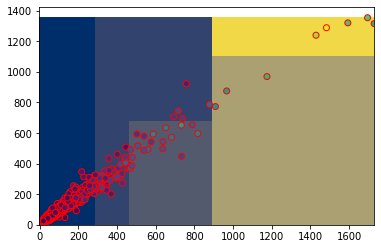

In [114]:
x0_min, x0_max = min(x[:,0])- 0.5, max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1])- 0.5, max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max ,1),np.arange(x1_min, x1_max ,1))
z = tree_reg.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z ,cmap = 'cividis') 
#cmap{tab10,binary,gray,plt.cm.gray,plt.get_cmap('jet'),magma,viridis', 'plasma', 'inferno', 'cividis'} 
# colors = ('c','r','b','m','g'),intensity = 0.5)
plt.scatter(x[:,0],x[:,1],c = y, edgecolors='r',marker = 'o')


In [98]:
from sklearn import tree

In [102]:
feature_names = ['CT-B1','CT-Z1']
class_names = []

[Text(418.5, 713.475, 'CT-B1 <= 466.126\nmse = 17746.897\nsamples = 3574\nvalue = 70.858'),
 Text(209.25, 509.625, 'CT-B1 <= 124.549\nmse = 4959.993\nsamples = 3542\nvalue = 61.667'),
 Text(104.625, 305.775, 'CT-B1 <= 54.542\nmse = 939.735\nsamples = 3175\nvalue = 43.95'),
 Text(52.3125, 101.92499999999995, 'mse = 252.114\nsamples = 2199\nvalue = 29.494'),
 Text(156.9375, 101.92499999999995, 'mse = 957.305\nsamples = 976\nvalue = 76.521'),
 Text(313.875, 305.775, 'CT-B1 <= 290.313\nmse = 13534.21\nsamples = 367\nvalue = 214.933'),
 Text(261.5625, 101.92499999999995, 'mse = 5943.653\nsamples = 319\nvalue = 185.227'),
 Text(366.1875, 101.92499999999995, 'mse = 19139.14\nsamples = 48\nvalue = 412.356'),
 Text(627.75, 509.625, 'CT-B1 <= 893.859\nmse = 388634.349\nsamples = 32\nvalue = 1088.263'),
 Text(523.125, 305.775, 'CT-Z1 <= 674.107\nmse = 91323.751\nsamples = 24\nvalue = 783.519'),
 Text(470.8125, 101.92499999999995, 'mse = 84129.58\nsamples = 19\nvalue = 843.643'),
 Text(575.4375, 1

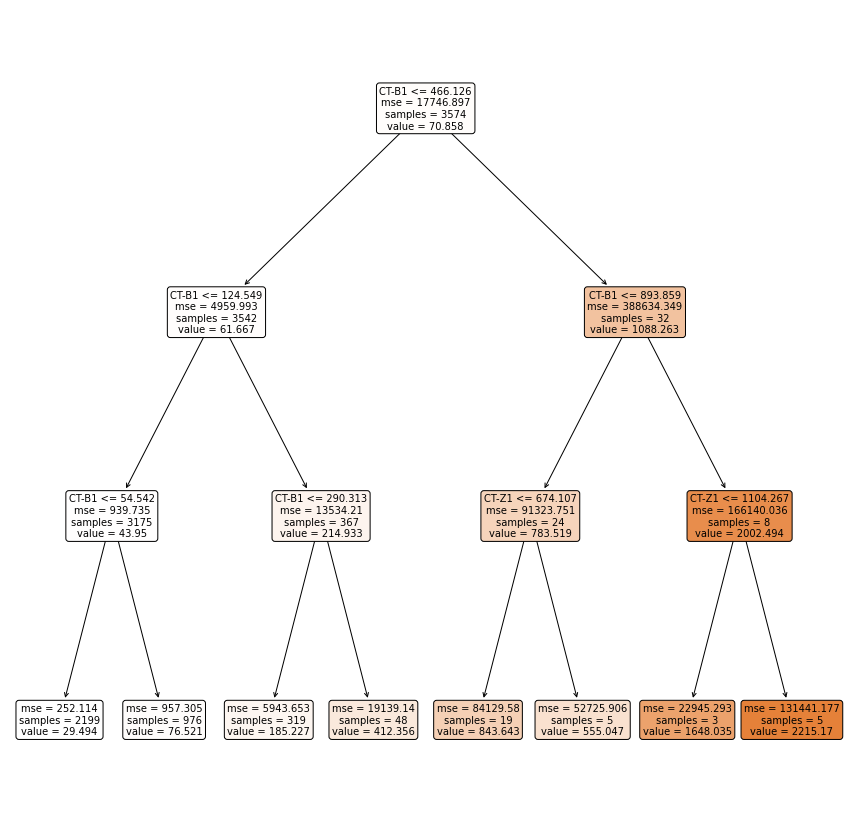

In [115]:
plt.figure(figsize=(15,15))
tree.plot_tree(tree_reg, filled = True, feature_names=feature_names,rounded = True)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [66]:
x = sorted(np.random.randn(100))
x = np.array(x)
x = x.reshape((-1,1))

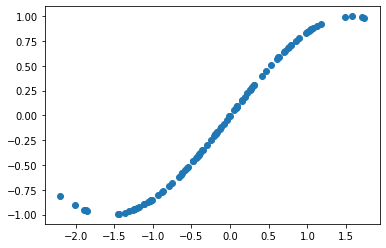

In [67]:
#x = np.random.randn(100).reshape((-1,1))
#print(x.sort())
y = np.sin(x)
plt.scatter(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1234)


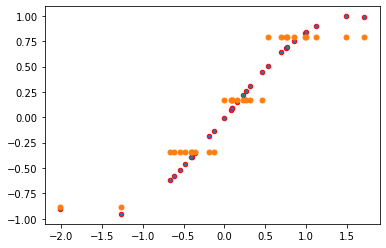

In [77]:
tree_reg1 = DecisionTreeRegressor(max_depth= 2,random_state= 1234)
tree_reg2 = DecisionTreeRegressor(max_depth= 5,random_state= 1234)
tree_reg1.fit(x_train, y_train)
tree_reg2.fit(x_train, y_train)
y_pred1 = tree_reg1.predict(x_test)
y_pred2 = tree_reg2.predict(x_test)
plt.scatter(x_test,y_test,s =20, edgecolors= 'r')
plt.scatter(x_test,y_pred1, s = 25)
plt.show()

In [29]:
lst = []
for i in y_pred1:
    if i not in lst:
        lst.append(i)
lst

[0.46073460255562454,
 -0.17342820229257863,
 -0.7695427845712212,
 0.8866484994836015]